# Recommended Joke Notebook

Today, we'll use some joke rating data to check out recommendating systems, in particular collaborative filtering:

Here's a link to the place where I got the data:
http://goldberg.berkeley.edu/jester-data/

Check out some jokes, and get recommended jokes based on your ratings:
http://eigentaste.berkeley.edu/

In [2]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

### Load the Data

- Each row is a user
- The first column is the total number of jokes rated by that user.
- The remaining columns are the ratings of the individual jokes, from -10 to 10
- An entry of 99 means no rating.

In [3]:
data = pd.read_csv('jester_data.csv', header=None).values
data[data==99] = 0
number_rated = data[:, 0]
ratings = data[:, 1:]
ratings[:5,:5]

array([[-7.82,  8.79, -9.66, -8.16, -7.52],
       [ 4.08, -0.29,  6.36,  4.37, -2.38],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  9.03],
       [ 0.  ,  8.35,  0.  ,  0.  ,  1.8 ],
       [ 8.5 ,  4.61, -4.17, -5.39,  1.36]])

In [4]:
ratings.shape

(73421, 100)

# Do some EDA on the data

How many jokes does an average person rate? What is most jokes rated? What is the fewest number of jokes rated?

How many ratings on average does each joke have?

What is a joke with the most ratings? Which is one with the fewest ratings?

What is the average rating for all jokes? (Be sure to exclude the 0 values!)

In [29]:
data_DF = pd.DataFrame(data)
ratings_DF = pd.DataFrame(ratings)

data_DF.head()


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74.0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49.0,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,48.0,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [30]:
data_DF.describe()

#average of 56 ratings per user
#most jokes rated is all 100 jokes
#fewest number of jokes rated is zero


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
count,73421.000000,73421.000000,73421.000000,73421.000000,73421.000000,73421.000000,73421.000000,73421.000000,73421.000000,73421.000000,...,73421.000000,73421.000000,73421.000000,73421.000000,73421.000000,73421.000000,73421.000000,73421.000000,73421.000000,73421.000000
mean,56.117773,0.393423,0.078312,0.085356,-0.587042,0.235301,0.717474,-0.633774,-0.996131,-0.259607,...,0.543751,0.324124,0.659236,0.321433,0.309997,0.414464,0.457475,0.269036,-0.011429,0.296525
std,29.066602,3.491382,3.901926,3.621108,3.471794,5.302325,3.714736,5.610147,4.967938,3.379664,...,2.888323,2.820525,2.760490,2.870173,2.885717,2.762403,2.904044,3.008637,2.940424,2.789072
min,0.000000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,...,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,-4.030000,0.000000,-5.870000,-5.190000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52.000000,0.000000,0.000000,0.000000,0.000000,0.920000,0.000000,-0.290000,-0.630000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,0.530000,0.390000,0.000000,0.000000,4.370000,2.380000,3.880000,2.770000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,9.610000,9.370000,9.610000,9.370000,9.510000,9.660000,10.000000,9.760000,9.900000,...,9.560000,9.610000,9.370000,9.420000,9.370000,9.370000,9.370000,9.370000,9.810000,9.370000


In [33]:
#number of people who rated each joke
ratings_per_joke = ratings_DF.astype(bool).sum(axis=0)

#most ratings is joke number 15
print np.argmax(ratings_per_joke)


print np.mean(ratings_per_joke)

15
41237.56


In [34]:
ratings_per_joke.head()

0    31926
1    35178
2    32296
3    30430
4    73194
dtype: int64

# Unregularized SVD Based Collaborative Filtering

## step 1: full SVD

We'll do a simple though not very effective way at collaborative filtering: a simple SVD approach.

SVD (singular value decomposition) is a way of decomposing a matrix into thing like eigenvectors and eigenvalues. It looks like this for a matrix M:

M = U * S * V

Here, if we suppose M is an n by p matrix:
U is an N by p matrix
S is a p by p diagonal matrix
V is a p by p matrix

In our problem, we have n users rating p jokes

In recommender problems, it has the interpretation as follows:
U is a representation of the users, as p features
V is a representation of the jokes, as p features (different from those in U)
S is a vector that gives the joint importance of both feature sets

In [19]:
# full svd; note the first column is dropped since that has the number of jokes rated, we don't care about that
u, s, v = np.linalg.svd(ratings, full_matrices=False)

print u.shape
print s.shape
print v.shape

# these are (nearly) the same, that's the decomposition!
print data[:, 1:]
print np.dot(np.dot(u, np.diag(s)), v) # the full reconstruction

(73421, 100)
(100,)
(100, 100)
[[-7.82  8.79 -9.66 ...,  0.    0.    0.  ]
 [ 4.08 -0.29  6.36 ...,  0.34 -4.32  1.07]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]]
[[ -7.82000000e+00   8.79000000e+00  -9.66000000e+00 ...,  -2.57571742e-14
   -4.06341627e-14  -5.32907052e-14]
 [  4.08000000e+00  -2.90000000e-01   6.36000000e+00 ...,   3.40000000e-01
   -4.32000000e+00   1.07000000e+00]
 [  1.18133678e-14   2.25933694e-14   2.08051887e-14 ...,   2.39808173e-14
    1.31006317e-14  -1.99840144e-15]
 ..., 
 [  9.53566584e-15   1.53360951e-15   2.01976018e-15 ...,   2.44249065e-15
   -1.77635684e-15   1.99840144e-15]
 [  1.05011316e-14   1.25922002e-14   1.79581777e-14 ...,   2.66453526e-15
    3.83026943e-15   8.88178420e-16]
 [  1.21649734e-14  -5.40528933e-15  -3.22277500e-15 ...,  -6.80011603e-15
   -2.22044605e-16  -2.88657986e-15]]


##  Step 2: Filling in values by truncating the SVD

The SVD above just recovers the original matrix. That is not very interesting, we want to get a new estimate for those missing values. To do this, we need to drop dimensions.

Inspect S, you should see that it is sorted in decreasing order. Write code to only take the first few dimensions in each of the projections. This means simply to replace the matrix S (you will have to construct it using np.diag) with a new matrix with many of the diagonal values zeroed out.

In [28]:
s_adj = s.copy()

#create new S where we set the values of everything other than the first three values equal to zero
#This makes everything after the first three latent features have zero weight when we reconstruct the ratings.
s_adj[3:] = 0

s_adj_diag = np.diag(s_adj)
s_adj_diag

#reconstruct 
ratings_pred = np.dot(np.dot(u, s_adj_diag), v)

You should now have an approximation to the original matrix. Take the filled in values only and compare them to the non filled in values, do this for a few users and jokes. You might find it useful to write a function to inspect a row or column. Considering doing things like:

0. Count how many values are filled in, how many were already present for that row / column
1. Compare the range of the filled in values with those not filled in within the row or column
2. Compare the mean of the filled in values with those not filled in within the row or column

In [47]:
test = ratings_DF.iloc[4,]
#test.astype(bool)

In [48]:
#Convert predicted values to dataframe
ratings_pred_DF = pd.DataFrame(ratings_pred)


def inspect_filled_in_joke(ii):
    #how many values were filled in in the actual ratings?
    filled_in_actual = ratings_DF.astype(bool).sum(axis=0)
    filled_in_actual_joke = filled_in_actual[ii]
    print "Joke " + str(ii) + " was actually rated by " + str(int(filled_in_actual_joke)) + " users"
    
    #how many values were filled in in the predicted ratings
    filled_in_pred = ratings_pred_DF.astype(bool).sum(axis=1)
    filled_in_pred_joke = filled_in_actual[ii]
    print "Predictions for joke " + str(ii) + " were filled in for " + str(int(filled_in_pred_joke)) + " users"
    
    #look at the mean of filled in actual ratings and filled in predicted ratings
    filled_in_actual = ratings_DF.iloc[ii,]
    #get non-zero ratings
    filled_in_actual_non_zero = filled_in_actual[filled_in_actual.astype(bool)]
    #get mean
    mean_actual = np.mean(filled_in_actual_non_zero)
    print "The mean of non-zero actual ratings for joke " + str(ii) + " is " + str(mean_actual)
    
    filled_in_pred = ratings_pred_DF.iloc[ii,]
    #get non-zero ratings
    filled_in_pred_non_zero = filled_in_pred[filled_in_pred.astype(bool)]
    #get mean
    mean_pred = np.mean(filled_in_pred_non_zero)
    print "The mean of non-zero predicted ratings for joke " + str(ii) + " is " + str(mean_pred)
    
    
    
def inspect_filled_in_user(ii):
    pass

inspect_filled_in_joke(25)
print "\n-----\n"
inspect_filled_in_user(2)

Joke 25 was actually rated by 48443 users
Predictions for joke 25 were filled in for 48443 users
The mean of non-zero actual ratings for joke 25 is 4.22328358209
The mean of non-zero predicted ratings for joke 25 is 3.12938155219

-----



## Step 3: Let's actually use this thing. 

Write a function to recommend a joke (s)he's not rated to a user who has at least one unrated joke. Use it for a few people and print the results.

Use it on all users and make a histogram of the recommendations. Compare this to a histogram of missing values (number of times a joke was not rated). Does this system recommend a joke very often? Does it make sense?

## Step 4: Examining the joke and user spaces

The SVD gave us projections of both the users and the jokes. Let's see if those projections give us any insight.

Now, plot the first two rows (the projection dimensions appear on the rows here) of the joke projection matrix. Are there different types of jokes?

Plot the first two columns (the projection dimensions appear on the columns here) of the user projection matrix. Are there different types of users?

In [52]:
u.shape

(73421, 100)

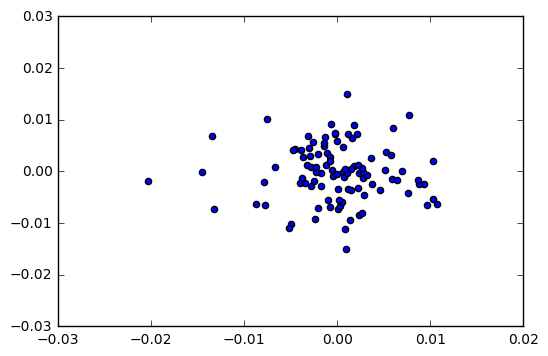

In [55]:
plt.scatter(u[0,], u[1,])